In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import scikits.bootstrap as bootstrap  
import scipy as sp
import statsmodels.api as sm

In [36]:
data = pd.read_csv('wages1.csv')

In [37]:
data.describe()

,exper,male,school,wage
count,3294.000000,3294.000000,3294.000000,3294.000000
mean,8.043412,0.523679,11.630540,5.757585
std,2.290661,0.499515,1.657545,3.269186
min,1.000000,0.000000,3.000000,0.076556
25%,7.000000,0.000000,11.000000,3.621570
50%,8.000000,1.000000,12.000000,5.205782
75%,9.000000,1.000000,12.000000,7.304506
max,18.000000,1.000000,16.000000,39.808918


In [38]:
data.corr()

,exper,male,school,wage
exper,1.000000,0.129545,-0.193565,0.051381
male,0.129545,1.000000,-0.119084,0.178174
school,-0.193565,-0.119084,1.000000,0.282492
wage,0.051381,0.178174,0.282492,1.000000


In [39]:

print("Mean", np.mean(data[data["male"] == 1]["wage"]))
print("Standard Error", sp.stats.sem(data[data["male"] == 1]["wage"]))

# compute 95% confidence intervals around the mean  
CIs = bootstrap.ci(data=data[data["male"] == 1]["wage"], statfunction=scipy.mean) 
print("Bootstrapped 95% confidence intervals  Low:", CIs[0], "  High:", CIs[1])


Mean 6.313021172591305
Standard Error 0.08424268154142373
Bootstrapped 95% confidence intervals  Low: 6.152893539008695   High: 6.486152051936232


In [40]:
print("Mean", np.mean(df[df["male"] == 0]["wage"]))
print("Standard Error", sp.stats.sem(df[df["male"] == 0]["wage"]))

# compute 95% confidence intervals around the mean  
CIs = bootstrap.ci(data=df[df["male"] == 0]["wage"], statfunction=scipy.mean) 
print("Bootstrapped 95% confidence intervals  Low:", CIs[0], "  High:", CIs[1])


Mean 5.146923873736775
Standard Error 0.07261280576530511
Bootstrapped 95% confidence intervals  Low: 5.009246416330784   High: 5.290879153719566


In [53]:
# X = data[data.columns.difference(['wage'])]
X = data['male']
y = data['wage']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     107.9
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           6.71e-25
Time:                        01:15:25   Log-Likelihood:                -8522.2
No. Observations:                3294   AIC:                         1.705e+04
Df Residuals:                    3292   BIC:                         1.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1469      0.081     63.366      0.000       4.988       5.306
male           1.1661      0.112     10.389      0.000       0.946       1.386
==============================================================================
Omnibus:                     1538.963   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15569.712
Skew:                           1.965   Prob(JB):                         0.00
Kurtosis:                      12.899   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Alternative Method
from statsmodels.formula.api import ols
# data = pd.DataFrame({'x': x, 'y': y})
model = ols("wage ~ male + exper", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     55.38
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.21e-24
Time:                        01:43:24   Log-Likelihood:                -8520.8
No. Observations:                3294   AIC:                         1.705e+04
Df Residuals:                    3291   BIC:                         1.707e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8293      0.207     23.288      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


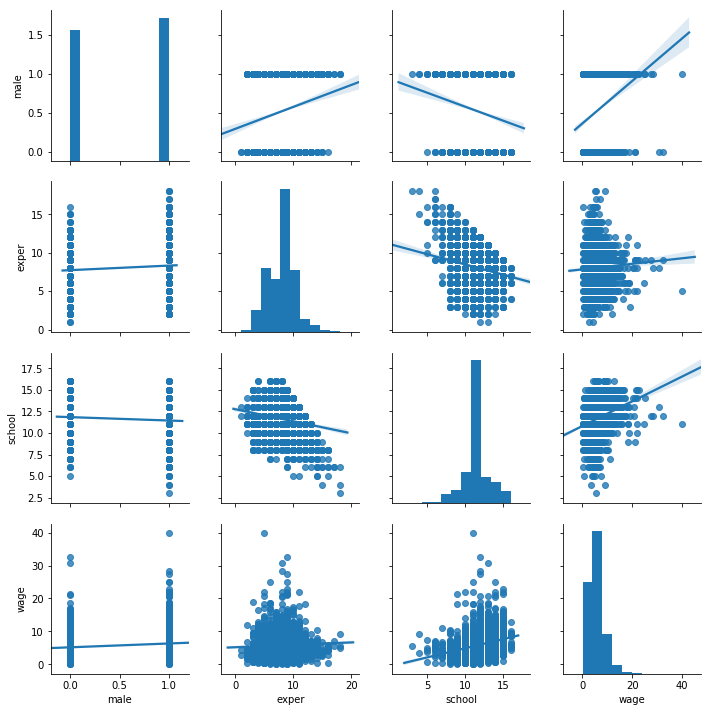

In [77]:
import seaborn
seaborn.pairplot(data, vars=['male', 'exper', 'school','wage'],
                 kind='reg') 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


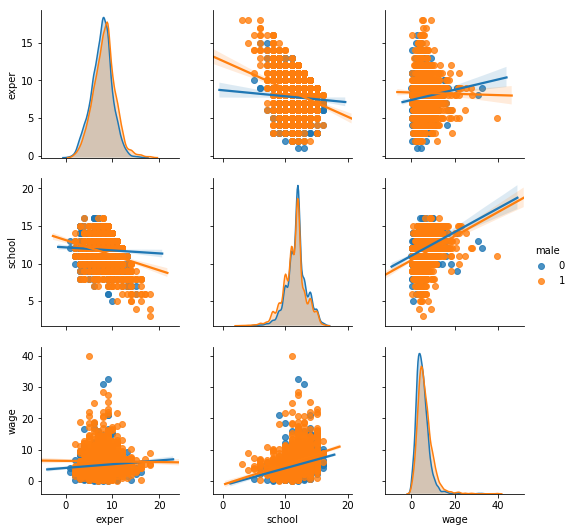

In [78]:
seaborn.pairplot(data, vars=['exper', 'school', 'wage'],
                 kind='reg', hue='male') 

In [80]:
result = ols(formula='wage ~ male + exper + school',
                data=data).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     167.6
Date:                Thu, 08 Nov 2018   Prob (F-statistic):          4.02e-101
Time:                        01:50:03   Log-Likelihood:                -8341.1
No. Observations:                3294   AIC:                         1.669e+04
Df Residuals:                    3290   BIC:                         1.671e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3800      0.465     -7.269      0.0

In [59]:
# X = data[data.columns.difference(['wage'])]
data['female'] = (data['male'] + 1)%2
X = data[['male', 'female']]
y = data['wage']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     53.87
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           9.56e-24
Time:                        01:28:35   Log-Likelihood:                -8522.3
No. Observations:                3294   AIC:                         1.705e+04
Df Residuals:                    3291   BIC:                         1.707e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+12   3.77e+12     -0.375      0.708   -8.81e+12    5.98e+12
male        1.415e+12   3.77e+12      0.375      0.708   -5.98e+12    8.81e+12
female      1.415e+12   3.77e+12      0.375      0.708   -5.98e+12    8.81e+12
==============================================================================
Omnibus:                     1537.697   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15546.963
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      12.892   Cond. No.                     1.43e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""